In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,  accuracy_score


In [ ]:
# Load the dataset
churn_df = pd.read_csv("C:/Users/Azur/Downloads/Seeva.csv")
eda = copy_dataset = pd.DataFrame(churn_df)
churn_df.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
churn_df.shape, churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(10000, 14, None)

In [38]:
churn_df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [39]:
churn_df = churn_df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
churn_df["Gender"] = LabelEncoder().fit_transform(churn_df["Gender"])  # Male=1, Female=0
churn_df["Geography"] = LabelEncoder().fit_transform(churn_df["Geography"])  # Map countries to integers
churn_df.sample(5)

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
3993          696          2       1   40       3  153639.11              1   
4866          522          1       0   37       3   95022.57              1   
6628          596          2       1   57       6       0.00              2   
413           693          1       0   41       9  181461.48              3   
9359          645          1       1   43       9  140121.17              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
3993          1               1        138351.68       0  
4866          1               1        129107.59       0  
6628          1               1         72402.00       0  
413           1               1        187929.43       1  
9359          1               0         11302.70       1

In [22]:

X = churn_df.drop("Exited", axis=1)
y = churn_df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred)*100,"%")

Accuracy 86.45 %


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



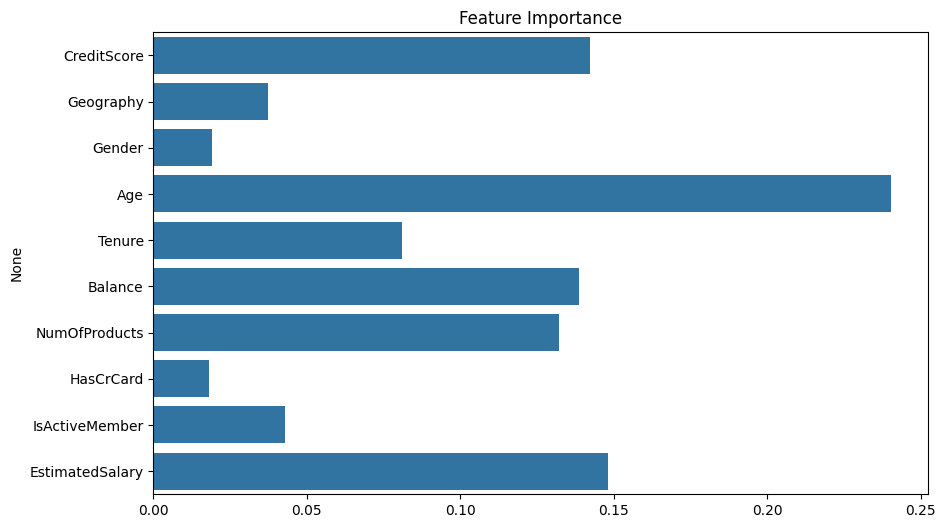

In [30]:
feature_importance = model.feature_importances_
features = churn_df.columns[:-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.show();

C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_9280\2757109091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=eda["Exited"], palette="coolwarm")


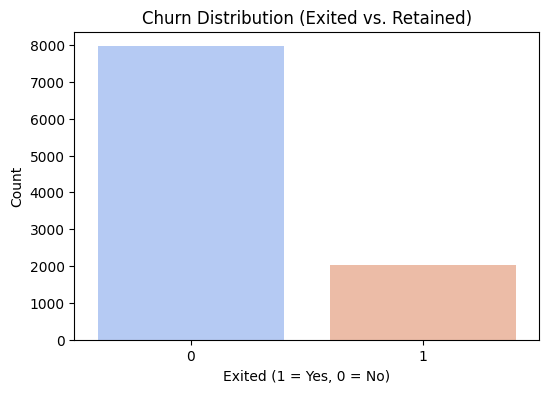

In [42]:
# 1️⃣ Churn Distribution (Bar Plot)
plt.figure(figsize=(6, 4))
sns.countplot(x=eda["Exited"], palette="coolwarm")
plt.title("Churn Distribution (Exited vs. Retained)")
plt.xlabel("Exited (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show();

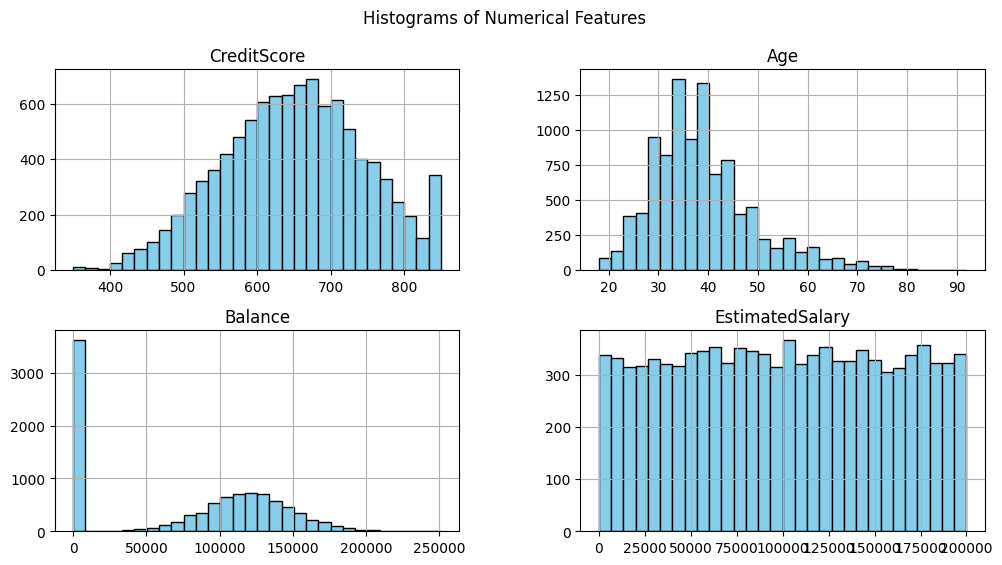

In [43]:
num_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
eda[num_cols].hist(figsize=(12, 6), bins=30, color='skyblue', edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show();

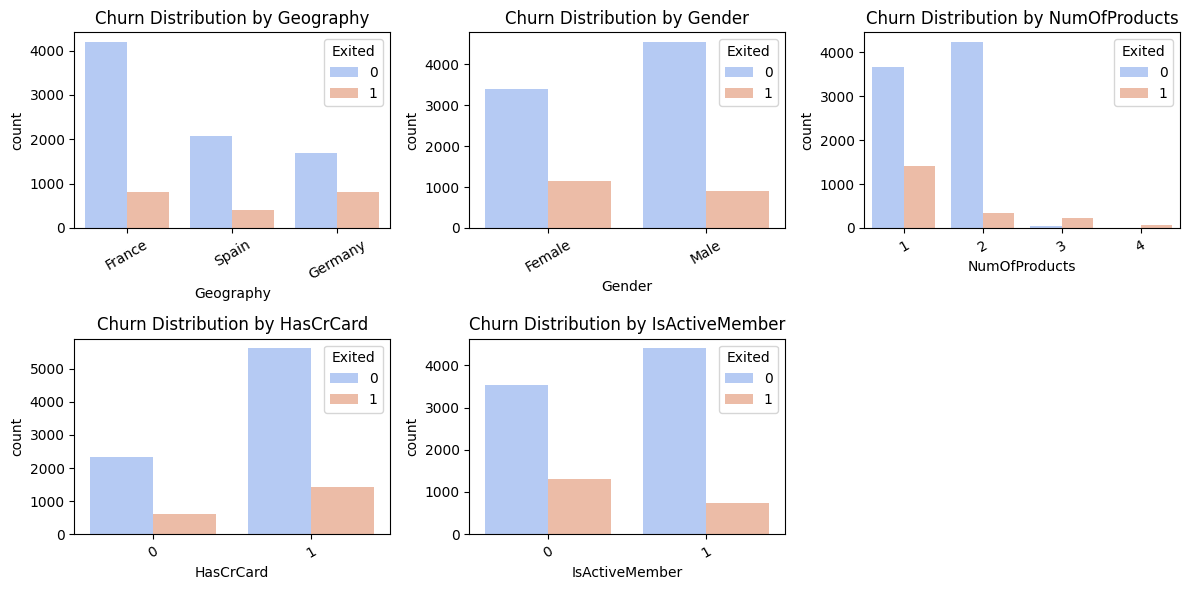

In [44]:
plt.figure(figsize=(12, 6))
categorical_cols = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue="Exited", data=eda, palette="coolwarm")
    plt.title(f"Churn Distribution by {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show();